In [4]:
import datetime as dt
import os
import re

import numpy as np
import rasterio


import pandas as pd

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import fiona
import rasterio
import rasterio.mask

In [6]:
BASE_URL = "https://data.chc.ucsb.edu/products/CHIRPS-2.0/africa_daily/tifs/{resolution}/{year}/chirps-v2.0.{year}.{month:02d}.{day:02d}.tif.gz"


In [27]:
date = dt.date(2010, 1, 2)
url = BASE_URL.format(resolution="p05", year=date.year, month=date.month, day=date.day)


In [28]:
url

'https://data.chc.ucsb.edu/products/CHIRPS-2.0/africa_daily/tifs/p05/2010/chirps-v2.0.2010.01.02.tif.gz'

In [29]:
x = re.search(r'([0-9]{4})\.([0-9]{2})\.([0-9]{2})\.tif', os.path.basename(url))


In [69]:
file = '/Users/jona/htdocs/MARS/esida-db/output/Moshi DC/chc_chirps/chirps-v2.0.2019.11.16.tif'

In [70]:
dataset = rasterio.open(file, nodata=-9999.0)
band1 = dataset.read(1, masked=True)

In [71]:
band1

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [72]:
np.nanmean(band1)

0.0

In [73]:
band1[band1==-9999] = np.nan

In [74]:
band1

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [75]:
np.nanmean(band1)

0.0

In [78]:
tiff = '/Users/jona/htdocs/MARS/esida-db/input/data/worldpop_urbanext/tza_bsgme_v0a_100m_2015.tif'
#tiff = '/Users/jona/htdocs/MARS/esida-db/input/data/worldpop_popc/tza_ppp_2019_UNadj.tif'
mask = '/Users/jona/htdocs/MARS/esida-db/input/shapes/Districts/Mjini.shp'
#mask = '/Users/jona/htdocs/MARS/esida-db/input/shapes/Districts_Shapefiles_2019/Districts and TC as 2020 FIXED.shp'

In [79]:
import fiona
import rasterio
import rasterio.mask

# rasterio stats tool

In [80]:
from rasterstats import zonal_stats

zonal_stats(mask, tiff,
            stats="count min mean max median sum")

[{'min': 0.0,
  'max': 1.0,
  'mean': 0.8446280991735537,
  'count': 1815,
  'sum': 1533.0,
  'median': 1.0}]

# rasterio stand alone

In [81]:
with fiona.open(mask, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [88]:
with rasterio.open(tiff) as src:
    nodata=src.nodata
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
    
    band1 = src.read(1, masked=True)

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("RGB.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    

In [87]:
band2 = out_image[0]

In [92]:
nodata

255.0

In [98]:
band2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [100]:
band3 = band2.astype(np.float32)

In [96]:
int(np.nan)

ValueError: cannot convert float NaN to integer

In [101]:
band3[band3 == 255] = np.nan

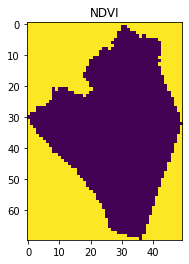

In [105]:
plt.imshow(band2)
plt.title("NDVI")
plt.show()

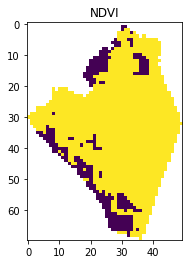

In [106]:
plt.imshow(band3)
plt.title("NDVI")
plt.show()

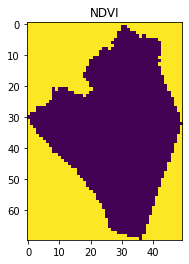

In [103]:
plt.imshow(out_image[0])
plt.title("NDVI")
plt.show()

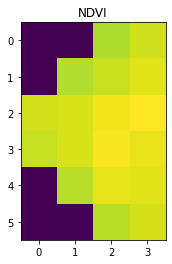

In [138]:
with rasterio.open("../output/Mjini/worldpop_pd/tza_pd_2000_1km_UNadj.tiff") as src2:
    band1 = src2.read(1)
    
    plt.imshow(band1)
    plt.title("NDVI")
    plt.show()



In [86]:
band1

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=uint8)

In [113]:
import earthpy.plot as ep
import geopandas as gpd

In [114]:
crop_bound = gpd.read_file(
    mask
)

<AxesSubplot:>

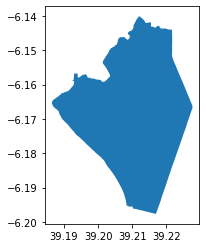

In [115]:
crop_bound.plot()

In [139]:
from dbconf import get_engine
df = pd.read_sql_query('SELECT id, name FROM district', con=get_engine())

[[[ 0.        0.        0.        0.      ]
  [ 0.       31.681482 23.208563  0.      ]
  [ 0.        0.        0.        0.      ]]]
[[31.681482 23.208563]]


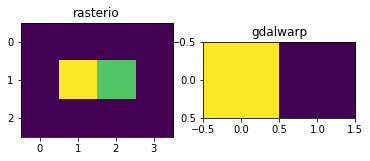

In [152]:
for i, row in df.iterrows():
    name = row['name']
    
    if name != 'Musoma MC':
        continue
    
    # rasterio wrapped shape
    with fiona.open(f"../input/shapes/Districts/{name}.shp", "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]
    
    
    with rasterio.open(f"../input/data/chc_chirps/chirps-v2.0.2019.12.25.tif") as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True, nodata=-9999)
        out_meta = src.meta
    
    
    print(out_image)
    
    # gdalwarp wrapped shape
    with rasterio.open(f"../output/{name}/chc_chirps/chirps-v2.0.2019.12.25.tif") as src2:
        band1 = src2.read(1)

    print(band1)

        
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=2)

    
    ax[0].set_title('rasterio')
    ax[0].imshow(out_image[0])

    
    ax[1].set_title('gdalwarp')
    ax[1].imshow(band1)
    
    plt.show()

    

# pop d test

In [7]:
tiff = '/Users/jona/htdocs/MARS/esida-db/input/data/worldpop_popd/tza_pd_2010_1km_UNadj.tif'
mask = '/Users/jona/htdocs/MARS/esida-db/input/shapes/Districts/Sikonge DC.shp'

In [29]:
with fiona.open(mask, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
    
with rasterio.open(tiff) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True, nodata=-99999)
    out_meta = src.meta
    
    band1 = src.read(1, masked=True)

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("RGB.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [30]:
band1 = out_image[0]
#band1[band1==-99999] = np.nan


In [31]:
band1

array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       ...,
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],
      dtype=float32)

In [33]:
np.nanmean(band1)

-42741.973

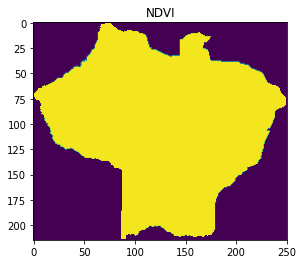

In [32]:
plt.imshow(band1)
plt.title("NDVI")
plt.show()

In [44]:
from pathlib import Path
import os 

p= Path("../input/data/worldpop_popd")

In [46]:
os.path.isfile(p / "tza_pd_2009_1km_UNadj.tiff")

True

In [49]:
p.as_posix()

'../input/data/worldpop_popd'

In [64]:
with rasterio.open('../output/Mjini/worldpop_urbanext/tza_bsgme_v0a_100m_2015.tif') as src:
    nodata = src.nodata
    
    band1 = src.read(1, masked=True)

total_cells = np.count_nonzero(~np.isnan(band1))
set_cells = np.count_nonzero(band1 == 1)


In [75]:
np.count_nonzero(band1)

3218

In [77]:
band1.count()

1815

In [74]:
band1.count()

1815

In [65]:
set_cells

1533

In [73]:
np.count_nonzero(band1 == 0)

282

In [72]:
np.count_nonzero(band1 == 1)

1533

In [71]:
np.count_nonzero(band1 == np.nan)

0

In [69]:
total_cells

3500

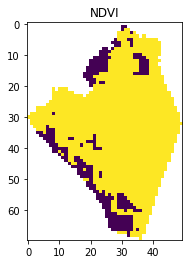

In [62]:
plt.imshow(band1)
plt.title("NDVI")
plt.show()